**Read the README.md file for details.** 
*I do not know how to create the table of contents, and it's too late to apply the sample template.*
### Title: Ocean Climate & Marine Life
### Student: Pavan Kumar
### Course: AIT-620

# About Data and Data Problem: 
As climate change accelerates, the world's oceans are experiencing significant transformations. This dataset compiles synthetic-yet-realistic measurements of sea surface temperature (SST), pH levels, coral bleaching severity, and species observations from ecologically critical marine zones. It spans from 2015 to 2023 and simulates how marine environments are responding to global warming, acidification, and heatwaves.

**Data Types:**

| Column Name           | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| Date                 | Date of observation                                                         |
| Location             | Marine location name (e.g., Great Barrier Reef, Maldives)                    |
| Latitude             | Latitude of the observation site                                             |
| Longitude            | Longitude of the observation site                                            |
| SST (°C)             | Sea Surface Temperature in degrees Celsius                                   |
| pH Level             | Acidity level of seawater (lower means more acidic, a sign of acidification) |
| Bleaching Severity   | Categorical variable: None, Low, Medium, High                                |
| Species Observed     | Count of marine species observed during the sampling period                  |
| Marine Heatwave      | Boolean flag (True/False) indicating whether SST > 30°C                      |


*Read the README.md file for details.*

In [2]:
import pandas as pd

In [3]:
# Location of DATA: https://www.kaggle.com/datasets/atharvasoundankar/shifting-seas-ocean-climate-and-marine-life-dataset/data
# This dataset has only 500 rows, I downloaded on the loal system for easy use and I have uploaded to GitHub also, as it's on local path. 

In [4]:
# Loading the climate data for review and get it's information
df = pd.read_csv('realistic_ocean_climate_dataset.csv')

In [5]:
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


In [6]:
# We can see the null values in our dataset, getting data information. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                500 non-null    object 
 1   Location            500 non-null    object 
 2   Latitude            500 non-null    float64
 3   Longitude           500 non-null    float64
 4   SST (°C)            500 non-null    float64
 5   pH Level            500 non-null    float64
 6   Bleaching Severity  350 non-null    object 
 7   Species Observed    500 non-null    int64  
 8   Marine Heatwave     500 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 31.9+ KB


In [7]:
# Bleahing Severity has 150 null values out of 500.
# Getting the data values
df['Bleaching Severity'].head(10)

0       NaN
1      High
2      High
3    Medium
4       NaN
5       Low
6       NaN
7       Low
8       Low
9      High
Name: Bleaching Severity, dtype: object

In [8]:
# Values for Bleaching we have High, Medium, Low and NaN
# Checking the impact of null values and how many percentages we have for High, Low, Medium

pct_bleech = df['Bleaching Severity'].value_counts(normalize=True) * 100
low_pct = pct_bleech.get('Low', 0)
low_pct


np.float64(37.714285714285715)

In [9]:
medium_pct = pct_bleech.get('Medium', 0)
medium_pct


np.float64(37.142857142857146)

In [10]:
high_pct = pct_bleech.get('High', 0)
high_pct

np.float64(25.142857142857146)

In [11]:
# Oops, we have 37, 37, and 25 percentages.
# In this case, it's not a good idea to use imputation and ordinal encoding.
# As we have more than 30% null values, and High, Medium, and Low also, 37, 37, and 25.
# Mathematically, it feels wrong, and it will cause the training results not to give importance values, as well as data separate all over.
# I am dropping the 'Bleaching Severity' column.

df.drop(['Bleaching Severity'], axis=1, inplace=True)


In [12]:
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,110,False


In [13]:
# Checking unique value on and make a judgement on one-hot-encoding.
# This shows the count of unique values for every column
df.nunique()


Date                500
Location              7
Latitude            488
Longitude           489
SST (°C)            313
pH Level            202
Species Observed     94
Marine Heatwave       2
dtype: int64

In [14]:
# We have 7 uique values for Location.
# Location fit on One-Hot-Encoding regualtion as it has clean categores, and we know that numberical for tranning data.

# Turning to binaries
df = pd.get_dummies(df, columns=['Location'], prefix='Loc')

In [15]:
# Defining my label as Sea Surface Temerature, as we are looking for a global warming.
# I am assuming this will be a good label. I can do more calculation later why it is a good choice.
y = df['SST (°C)']

In [16]:
# Defining the Features (X)
# We remove the Temperature and Date. As it can impact on scaling, plus we choose SST as our label
X = df.drop(columns=['SST (°C)', 'Date'])

In [17]:
# Doing the Feature Scaling. so we do not biased toward certain numbers. As we know bigger number can cause problems.
from sklearn.preprocessing import StandardScaler

# Choosing the columns with different value ranges
cols_to_scale = ['Latitude', 'Longitude', 'pH Level', 'Species Observed']
scaler = StandardScaler()
# Transform the data via scaler instance
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [18]:
# Time to split the data into 80% Training and 20% Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Time to run RandomForestRegressor
# We have temperature as numerical so it's better to use the Random Regressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [20]:
# Initializing and Train the Model
# using 100 experts (trees) to vote on the temperature.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
# Makeing Predictions
y_pred = model.predict(X_test)

# Getting mean absolute error and r-square
mean_abs_error = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
mean_abs_error

0.6886189999999971

In [23]:
r2

0.6905962158124718

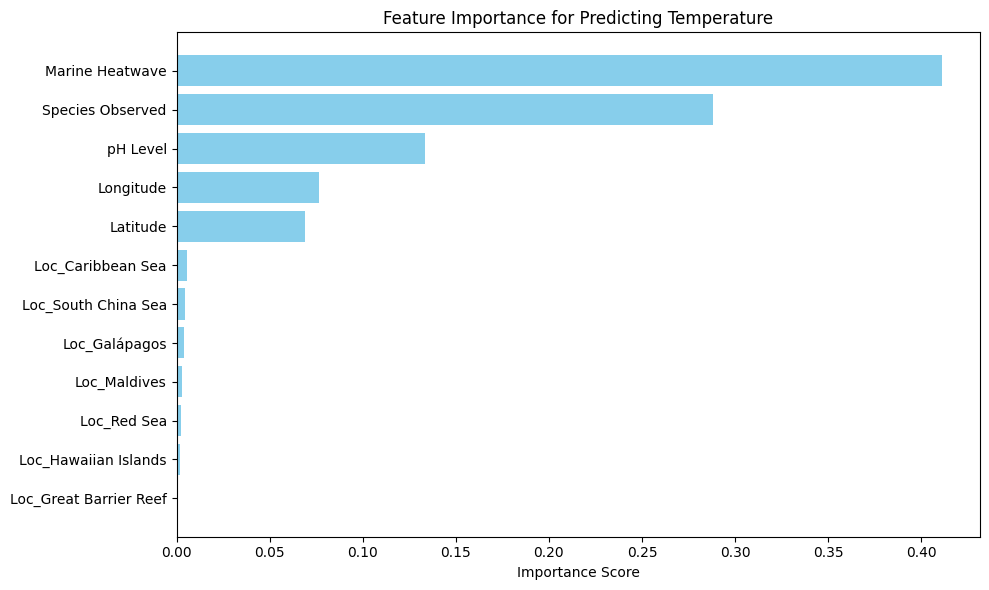

In [24]:
# I tried with 50 estimator I do not see much difference it is same. 
# Using the featue importance for preciting temperature.

# 4. Feature Importance
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance for Predicting Temperature')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importance_regressor.png')



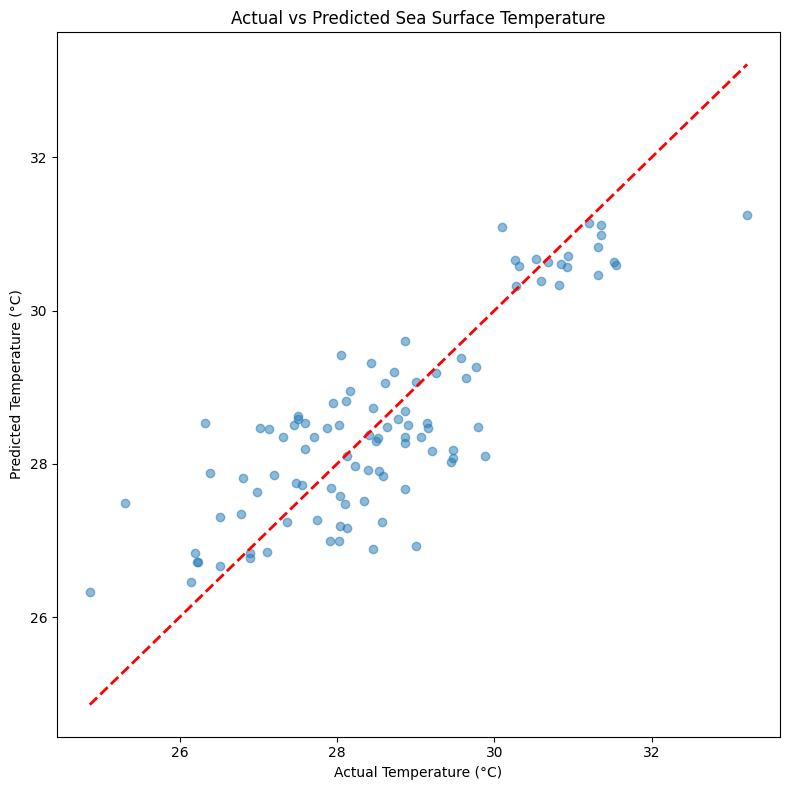

In [25]:
# In above image I do not see much value of location, we should drop it if need it.
# We see that Species Observerd, ph Level, and Latitue have contrinbution value but not the location
# Checking the prediction vs actual 
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Sea Surface Temperature')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')

In [26]:
# In above image of Actual VS Predicted Sea Surface Temerature
# Since our dots are clustered closely around the red line, we can say the model is very reliable, as we know linear regression 
# If the dots were scattered over the box, it would mean the model was guessing randomly.
# The spread of the dots away from the line represents our Mean Absolute Error 0.68°C, and most dots are less than 1 degree away from the line.

In [27]:
# What if scenario when we compare Ph with Temperature
# Taking the average of all features as our starting point
baseline_data = X.mean().to_frame().T

In [28]:
# Current pH in the scaled data is approximately 0 (the mean)
# Let's see what happens if pH drops --- becomes more acidic. 
# Since it is scaled, we can decrease it by 1 standard deviation.
acidity_scenario = baseline_data.copy()
acidity_scenario['pH Level'] = baseline_data['pH Level'] - 2.0 # Significant drop in pH
# Prediction 
temp_baseline = model.predict(baseline_data)[0]
temp_acidic = model.predict(acidity_scenario)[0]

In [29]:
temp_baseline

np.float64(28.298500000000008)

In [30]:
temp_acidic

np.float64(29.391300000000015)

In [31]:
# Difference of both
temp_acidic - temp_baseline


np.float64(1.0928000000000075)

In [32]:
# Hyperparameter Tuning to see if we can get better R2 and less Mean Absolute Error
from sklearn.model_selection import GridSearchCV

# Definning parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}


In [33]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

# Looking for the best settings
grid_search.fit(X_train, y_train)


,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [34]:
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 200}


In [35]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluating the "Fine-tuned" model
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)


In [36]:
print(f"Best Parameters: {best_params}")
print(f"Old MAE: 0.6847")
print(f"New MAE (Fine-tuned): {mae_best:.4f}")
print(f"New R2: {r2_best:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 200}
Old MAE: 0.6847
New MAE (Fine-tuned): 0.6531
New R2: 0.7174


In [ ]:
# We have R2 has 0.72 above than last calculation, and MAE as 0.65 which is also less than previously.
# We have identified optimal parameters (n_estimators: 200) 
